In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads (2).csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x = data.iloc[: ,[2,3]]

In [5]:
from sklearn.preprocessing import StandardScaler 

In [6]:
scaleobj =StandardScaler()

In [7]:
scsledX = scaleobj.fit_transform(x)

In [8]:
y = data.iloc[: ,[4]]

In [9]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(scsledX,y,test_size = 0.3 , random_state = 1)

In [10]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


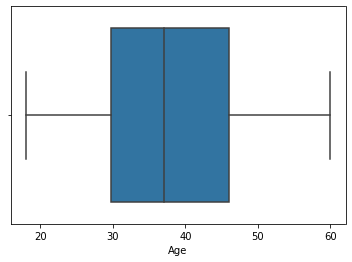

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


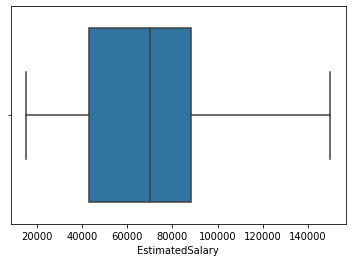

In [11]:
for i in x.columns :
  sns.boxplot(x[i])
  plt.show()

In [12]:
mod = tf.keras.models.Sequential()

In [13]:
mod.add(tf.keras.layers.Dense(units = 20 , activation = 'relu' , input_shape = (2,)))

In [14]:


# Hl -2
mod.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
mod.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
mod.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
mod.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
mod.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
mod.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
mod.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
# Hl - 3
mod.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
# output layer 
mod.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [15]:
mod.compile(optimizer="adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [16]:
mod_hist =mod.fit(xtrain  ,  ytrain , epochs = 150 , validation_data= [xtest ,ytest] , batch_size = 40)

Epoch 1/150
7/7 [==============================] - 2s 79ms/step - loss: 0.6921 - accuracy: 0.6464 - val_loss: 0.6915 - val_accuracy: 0.6000
Epoch 2/150
7/7 [==============================] - 0s 14ms/step - loss: 0.6882 - accuracy: 0.6607 - val_loss: 0.6894 - val_accuracy: 0.6000
Epoch 3/150
7/7 [==============================] - 0s 12ms/step - loss: 0.6844 - accuracy: 0.6607 - val_loss: 0.6865 - val_accuracy: 0.6000
Epoch 4/150
7/7 [==============================] - 0s 13ms/step - loss: 0.6791 - accuracy: 0.6607 - val_loss: 0.6826 - val_accuracy: 0.6000
Epoch 5/150
7/7 [==============================] - 0s 15ms/step - loss: 0.6716 - accuracy: 0.6607 - val_loss: 0.6768 - val_accuracy: 0.6000
Epoch 6/150
7/7 [==============================] - 0s 17ms/step - loss: 0.6605 - accuracy: 0.6607 - val_loss: 0.6680 - val_accuracy: 0.6000
Epoch 7/150
7/7 [==============================] - 0s 14ms/step - loss: 0.6435 - accuracy: 0.6607 - val_loss: 0.6548 - val_accuracy: 0.6000
Epoch 8/150
7/7 [===

In [24]:
mod_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

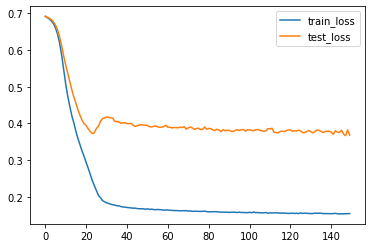

In [25]:
plt.plot(mod_hist.history['loss'], label = 'train_loss')
plt.plot(mod_hist.history['val_loss'], label = 'test_loss')
plt.legend()
plt.show()

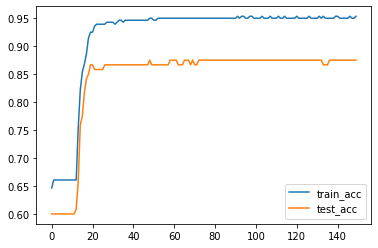

In [26]:
plt.plot(mod_hist.history['accuracy'], label = 'train_acc')
plt.plot(mod_hist.history['val_accuracy'], label = 'test_acc')
plt.legend()
plt.show()

In [27]:
pred_test = mod.predict(xtest)
pred_test = (pred_test > 0.5)

4/4 [==============================] - 0s 3ms/step


In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(ytest , pred_test))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        72
           1       0.80      0.92      0.85        48

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.87       120
weighted avg       0.88      0.88      0.88       120



In [30]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(ytest , pred_test)

array([[61, 11],
       [ 4, 44]])